<a href="https://colab.research.google.com/github/momna763/DIP/blob/main/Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import os

def create_digit_dataset(output_path, image_size=(28, 28), num_samples=5):
    """Generate synthetic dataset for digits 0-9."""
    os.makedirs(output_path, exist_ok=True)

    for digit in range(10):  # Digits 0-9
        for sample in range(1, num_samples + 1):
            image = np.zeros(image_size, dtype=np.uint8)  # Black background

            # Add white text representing the digit
            font = cv2.FONT_HERSHEY_SIMPLEX
            text = str(digit)
            font_scale = 1.0
            thickness = 2
            text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]  # Corrected line
            text_x = (image_size[1] - text_size[0]) // 2
            text_y = (image_size[0] + text_size[1]) // 2
            cv2.putText(image, text, (text_x, text_y), font, font_scale, 255, thickness)

            # Save the image
            file_name = f"{digit}_{sample}.png"
            cv2.imwrite(os.path.join(output_path, file_name), image)

# Generate dataset
output_path = "digit_dataset"
create_digit_dataset(output_path)
print(f"Dataset created in {output_path}")


Dataset created in digit_dataset


Visualizing templates for each digit...


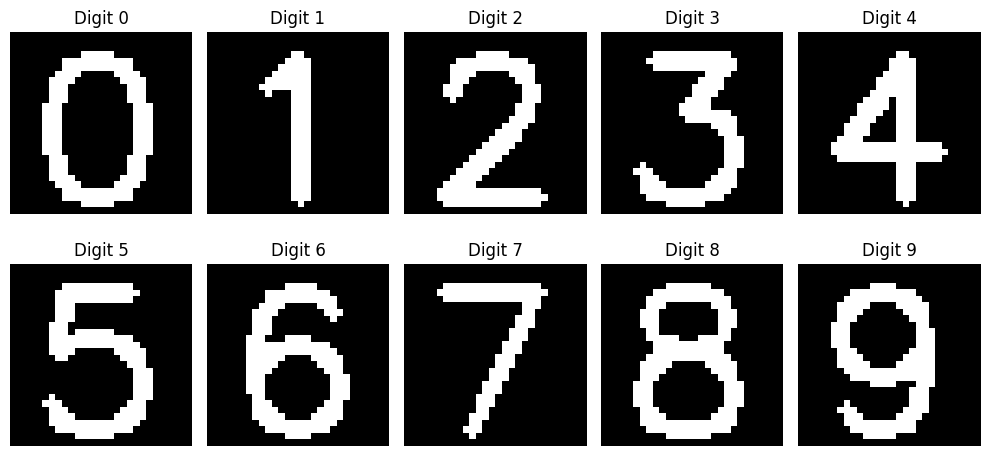

Accuracy: 100.00%

Predictions:
Test Sample 1: True Label = 2, Predicted Label = 2
Test Sample 2: True Label = 7, Predicted Label = 7
Test Sample 3: True Label = 6, Predicted Label = 6
Test Sample 4: True Label = 9, Predicted Label = 9
Test Sample 5: True Label = 3, Predicted Label = 3
Test Sample 6: True Label = 9, Predicted Label = 9
Test Sample 7: True Label = 5, Predicted Label = 5
Test Sample 8: True Label = 5, Predicted Label = 5
Test Sample 9: True Label = 6, Predicted Label = 6
Test Sample 10: True Label = 3, Predicted Label = 3
Test Sample 11: True Label = 2, Predicted Label = 2
Test Sample 12: True Label = 0, Predicted Label = 0
Test Sample 13: True Label = 7, Predicted Label = 7
Test Sample 14: True Label = 1, Predicted Label = 1
Test Sample 15: True Label = 0, Predicted Label = 0


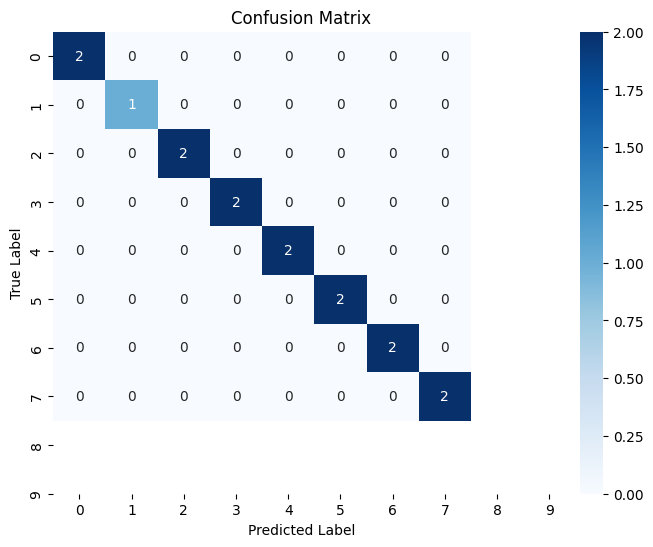

In [6]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def load_dataset(dataset_path):
    """Load images from a directory and create dataset."""
    dataset = []
    labels = []
    for digit in range(10):
        for i in range(1, 6):  # Assuming 5 samples per class
            image_path = os.path.join(dataset_path, f"{digit}_{i}.png")
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                dataset.append(image.flatten())
                labels.append(digit)
            else:
                print(f"Warning: Image not found or invalid at path: {image_path}")
    return np.array(dataset), np.array(labels)

def template_matching_feature_extraction(images, templates):
    """Extract features from images using template matching."""
    features = []
    for image in images:
        # Ensure the image is reshaped and converted to correct type
        image = image.reshape(28, 28).astype(np.uint8)

        feature_vector = []
        for template in templates:
            # Ensure the template is converted to the same type as the image
            template = template.astype(np.uint8)
            res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
            feature_vector.append(np.max(res))  # Maximum correlation score
        features.append(feature_vector)
    return np.array(features)

def plot_templates(templates):
    """Visualize templates for each digit."""
    plt.figure(figsize=(10, 5))
    for i, template in enumerate(templates):
        plt.subplot(2, 5, i + 1)
        plt.imshow(template, cmap="gray")
        plt.title(f"Digit {i}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def main():
    dataset_path = "digit_dataset"  # Update this if your dataset is in a different location
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset path '{dataset_path}' does not exist.")
        return

    # Load dataset
    dataset, labels = load_dataset(dataset_path)
    if len(dataset) == 0:
        print("Error: No valid images found in the dataset.")
        return

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

    # Generate templates (average images for each class from training data)
    templates = []
    for digit in range(10):
        class_images = X_train[y_train == digit]
        if len(class_images) == 0:
            print(f"Warning: No training samples for digit {digit}.")
            continue
        template = np.mean(class_images, axis=0).reshape(28, 28)  # Average image
        templates.append(template.astype(np.uint8))  # Ensure correct type

    # Visualize the templates
    print("Visualizing templates for each digit...")
    plot_templates(templates)

    # Extract features using template matching
    X_train_features = template_matching_feature_extraction(X_train, templates)
    X_test_features = template_matching_feature_extraction(X_test, templates)

    # K-Nearest Neighbors (KNN) classifier
    knn = KNeighborsClassifier(n_neighbors=3)  # k=3
    knn.fit(X_train_features, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print predictions
    print("\nPredictions:")
    for i, (true_label, pred_label) in enumerate(zip(y_test, y_pred)):
        print(f"Test Sample {i + 1}: True Label = {true_label}, Predicted Label = {pred_label}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

if __name__ == "__main__":
    main()
